In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 一次模拟多个随机漫步

> 如果你希望模拟多个随机漫步过程（比如5000个），只需对上面的代码做一点点修改即可生成所有的随机漫步过程。只要给numpy.random的函数传入一个二元元组就可以产生一个二维数组，然后我们就可以一次性计算5000个随机漫步过程（一行一个）的累计和了：

In [13]:
nwalks = 5000
nsteps = 1000


# 0 or 1
draws = np.random.randint(0, 2, size=(nwalks, nsteps))


# 行走步长
steps = np.where(draws > 0, 1, -1)


# 行走总步长
walks = steps.cumsum(1)

In [24]:
print("行走步长：\n", steps)

行走步长：
 [[-1 -1 -1 ... -1 -1  1]
 [-1  1  1 ... -1 -1  1]
 [ 1 -1 -1 ...  1 -1  1]
 ...
 [ 1  1 -1 ... -1  1  1]
 [-1 -1  1 ... -1 -1  1]
 [ 1  1  1 ... -1 -1 -1]]


In [25]:
print("行走总步长：\n", walks)

行走总步长：
 [[ -1  -2  -3 ...  26  25  26]
 [ -1   0   1 ...  -2  -3  -2]
 [  1   0  -1 ... -12 -13 -12]
 ...
 [  1   2   1 ...   4   5   6]
 [ -1  -2  -1 ...  62  61  62]
 [  1   2   3 ...  24  23  22]]


> 现在，我们来计算所有随机漫步过程的最大值和最小值：

In [5]:
print(walks.max())
print(walks.min())

132
-121


> 得到这些数据之后，我们来计算30或－30的最小穿越时间。这里稍微复杂些，因为不是5000个过程都到达了30。我们可以用any方法来对此进行检查：

In [28]:
hits30 = (np.abs(walks) >= 30).any(1)

print("总步长 大于30的数据: \n", hits30)

总步长 大于30的数据: 
 [ True False False ... False  True  True]


In [29]:
print("全部合计： ")
hits30.sum() # Number that hit 30 or -30

全部合计： 


3385

> 然后我们利用这个布尔型数组选出那些穿越了30（绝对值）的随机漫步（行），并调用argmax在轴1上获取穿越时间：

In [30]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

crossing_times.mean()

507.488035450517

> 请尝试用其他分布方式得到漫步数据。只需使用不同的随机数生成函数即可，如normal用于生成指定均值和标准差的正态分布数据：

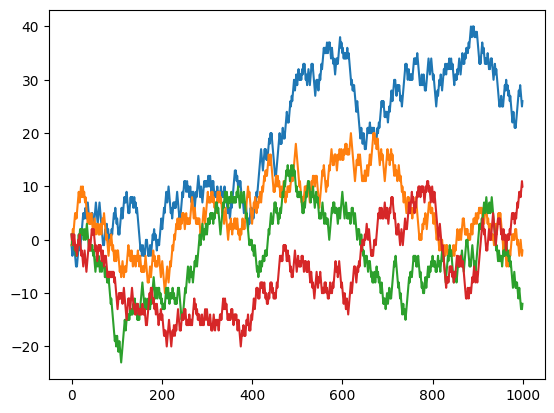

In [35]:
import matplotlib.pyplot as plt
from time import sleep


plt.plot(walks[0][:1000])
plt.plot(walks[1][:1000])
plt.plot(walks[2][:1000])
plt.plot(walks[3][:1000])
